# HR Analytics

This notebook addresses:
1. Why are company's best and most experienced employees leaving prematurely? 
2. Try to predict which valuable employee will leave next.
3. Build a system which may assist in staff retention

The HR analytics dataset is obtained from Kaggle [Human Resources Analytics](https://www.kaggle.com/ludobenistant/hr-analytics) dataset.

It shows details for last 5 years and contains the following fields:

* Employee satisfaction level, (range 0 to 1)
* Last evaluation, (range 0 to 1)
* Number of projects
* Average monthly, (in hours)
* Time spent at the company, (in years)
* Number of work accident
* Promotions in the last 5 years
* Sales (or job function)
* Salary (low, medium or high)
* Whether the employee has left the company or not


### Inital analysis of the dataset 

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
employees = pd.read_csv('HR_comma_sep.csv')
employees.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Data Preprocessing:
The sales are salary features are not numeric. So we need to do some preprocessing to convert them to numbers. 

In [4]:
employees['salary'] = pd.factorize(employees['salary'])[0]
employees['sales'] = pd.factorize(employees['sales'])[0]

Average values in different fields:

In [5]:
employees.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
sales                      3.339823
salary                     0.594706
dtype: float64

### Check correlation between features
To find out which feature affects the attrition the most, we calculate the correlation between different features.

In [6]:
correlation_matrix = employees.corr(method='pearson')
correlation_matrix 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.015413,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.011855,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.005577,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002387,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.001611,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.019215,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.043814,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.015170,0.098119
sales,0.015413,0.011855,0.005577,-0.002387,-0.001611,0.019215,-0.043814,0.015170,1.000000,0.033415
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,0.033415,1.000000


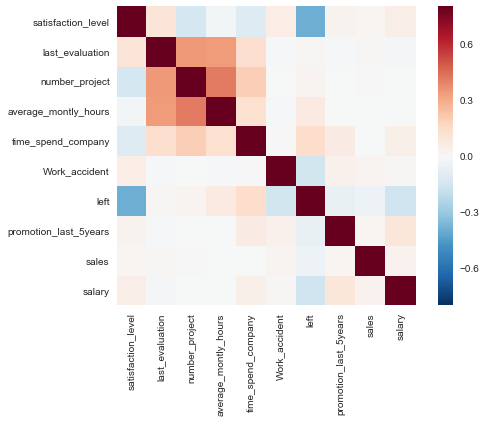

In [7]:
# To plot the correlation_matrix:
import seaborn as maps
maps.heatmap(correlation_matrix, vmax = .8, square = True)
plt.show()

From the above graph, it is clear that people who left have lower satisfaction level, had low salary and number of years spent in the company is high. So we can deduce that company is losing its experienced employees due to low salary and low satisfaction levels.

In [8]:
corr_left=pd.DataFrame(correlation_matrix['left'].drop('left').sort_values(ascending=False))
corr_left

,left
time_spend_company,0.144822
average_montly_hours,0.071287
number_project,0.023787
last_evaluation,0.006567
sales,-0.043814
promotion_last_5years,-0.061788
Work_accident,-0.154622
salary,-0.157898
satisfaction_level,-0.388375


### Distribution of some interesting features

Visualize effect of some of the interesting features on whether the employee has left or not.

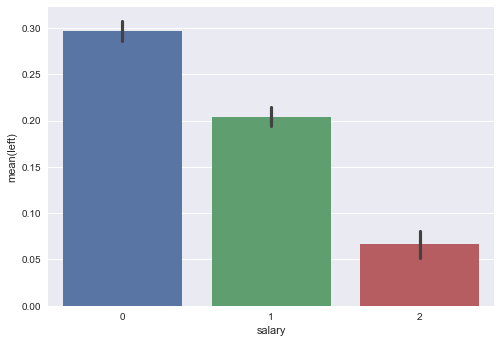

In [9]:
maps.barplot(x = 'salary', y = 'left', data = employees)

We see that people with less salary are more likely to leave the company

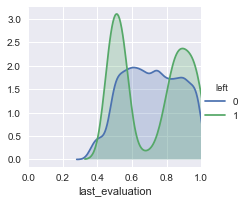

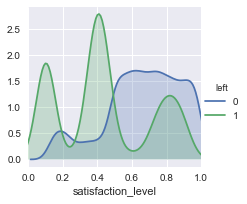

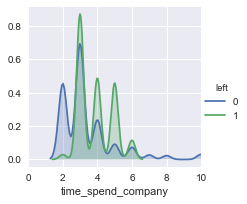

In [55]:
# For last_evaluation

plot_features = ['last_evaluation','satisfaction_level','time_spend_company']

for pf in plot_features:
    g = maps.FacetGrid(employees, hue="left")
    g.map(maps.kdeplot,pf,shade= True)
    g.set(xlim=(0, employees[pf].max()))
    g.add_legend()

Observations from the above graphs:
* People who have got low evaluation scores are more likely to leave
* People who have moderate satisfaction level (0.4) are more likely to leave.
* People who work for more than 6 years or less than 2 years are less likely to leave. 

## Preprocess data for different classifiers:

In [11]:
# To separate label and features in data
labels = np.where(employees['left'] == 1, 1, 0) 
features = employees.drop('left', axis = 1).as_matrix().astype(np.float)
label_names = np.unique(labels)
feature_names = list(employees.axes[1])

Splitting dataset into train and test data

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.1, random_state=0)

### Comparing Different Classifiers

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn import cross_validation, linear_model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

classifiers = [["KNN",KNeighborsClassifier(n_neighbors=3, weights='distance')],
["DT",DecisionTreeClassifier(random_state=0)],
["NB", MultinomialNB()]
]
    
classifier_types = []
for name, clf in classifiers:
    print '\nMetric for ' + name
    cv_predicted = cross_val_predict(clf, X_train, Y_train, cv=5)
    print metrics.classification_report(Y_train, cv_predicted)
    scores = cross_validation.cross_val_score(clf, X_train, Y_train)
    print '\nCross validation scores: ', scores.mean()

    clf.fit(X_train, Y_train)
    predictions = clf.predict(X_test)
    print 'Accuracy score for '+ name, accuracy_score(Y_test, predictions)
    classifier_types.append((name, clf))


Metric for KNN
             precision    recall  f1-score   support

          0       0.98      0.95      0.97     10287
          1       0.85      0.95      0.90      3212

avg / total       0.95      0.95      0.95     13499


Cross validation scores:  0.945847735711
Accuracy score for KNN 0.955333333333

Metric for DT
             precision    recall  f1-score   support

          0       0.99      0.98      0.98     10287
          1       0.94      0.96      0.95      3212

avg / total       0.98      0.98      0.98     13499


Cross validation scores:  0.97422041112
Accuracy score for DT 0.98

Metric for NB
             precision    recall  f1-score   support

          0       0.77      0.99      0.87     10287
          1       0.68      0.06      0.10      3212

avg / total       0.75      0.77      0.69     13499


Cross validation scores:  0.769241971467
Accuracy score for NB 0.77


We observe that <b>Decision tree classifier</b> is the best for this dataset.

### Predict if employee will leave or not with Decision Tree classifier

In [35]:
from sklearn.tree import export_graphviz
from sklearn import tree
clf = DecisionTreeClassifier(max_depth=5, min_impurity_split=1e-02)
clf = clf.fit(X_train, Y_train)
tree.export_graphviz(clf, out_file='tree.dot')

In [36]:
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("tree.pdf") 

True

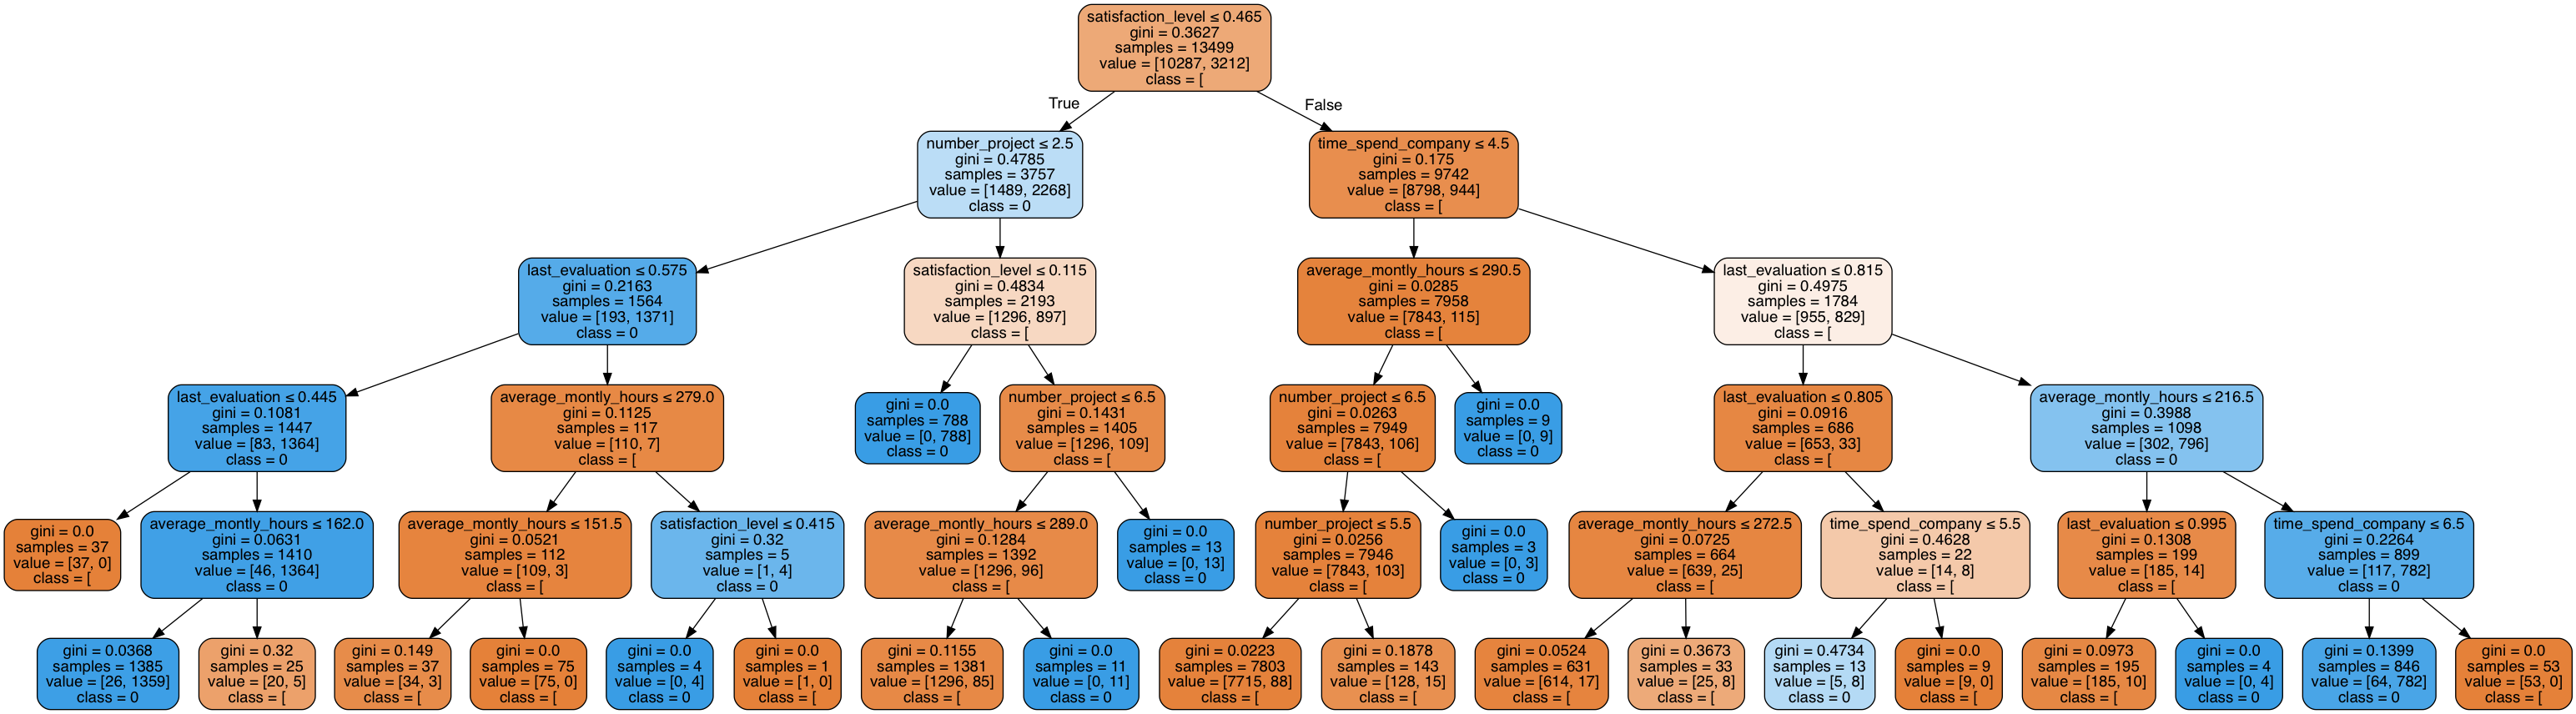

In [37]:
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=feature_names,  
                         class_names=str(label_names), 
                         filled=True, rounded=True,  
                         special_characters=True
                         )  
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_pdf("coloured_tree.pdf")
Image(graph.create_png())  

To check if the following test employee will leave or not

In [61]:
# Test employee features
test = [   0.44,    0.57,    2,    141,      3,      0,      0,      7,      1  ]

In [62]:
predict = clf.predict_proba(np.asarray(test).reshape(-9,9))
predict

array([[ 0.01877256,  0.98122744]])

<h4>This employee will leave!!! HR Action needed.</h4>

### Retention profile 

In [21]:
# Create a dataframe for employees who left.
left_df = employees[employees['left'] == 1]

# Create a dataframe for employees who stayed.
stay_df = employees[employees['left'] == 0]

In [44]:
retention_profile_mean = pd.DataFrame(columns=[list(employees)])
retention_profile_mean = retention_profile_mean.drop('left', 1)  # Drop the 'left' column
retention_profile_mean = retention_profile_mean.append({'satisfaction_level': stay_df['satisfaction_level'].mean(),
                                              'last_evaluation': stay_df['last_evaluation'].mean(),
                                              'number_project': stay_df['number_project'].mean(),
                                              'average_montly_hours': stay_df['average_montly_hours'].mean(),
                                              'time_spend_company': stay_df['time_spend_company'].mean(),
                                              'Work_accident': stay_df['Work_accident'].mode(),
                                              'promotion_last_5years': stay_df['promotion_last_5years'].mode(),
                                              'sales': stay_df['sales'].mean(),
                                              'salary': stay_df['salary'].mean()
                                             },
                                             ignore_index=True)

retention_profile_std = pd.DataFrame(columns=[list(employees)])
retention_profile_std = retention_profile_std.drop('left', 1)  # Drop the 'left' column
retention_profile_std = retention_profile_std.append({'satisfaction_level': stay_df['satisfaction_level'].std(),
                                              'last_evaluation': stay_df['last_evaluation'].std(),
                                              'number_project': stay_df['number_project'].std(),
                                              'average_montly_hours': stay_df['average_montly_hours'].std(),
                                              'time_spend_company': stay_df['time_spend_company'].std(),
                                              'Work_accident': stay_df['Work_accident'].std(),
                                              'promotion_last_5years': stay_df['promotion_last_5years'].std(),
                                              'sales': stay_df['sales'].std(),
                                              'salary': stay_df['salary'].std()
                                             },
                                             ignore_index=True)
retention_profile_mean
#retention_profile_std

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.66681,0.715473,3.786664,199.060203,3.380032,0 0 dtype: int64,0 0 dtype: int64,3.408908,0.650945


In [23]:
# Difference in job satisfaction between the two groups.
attrition_satisfaction = round(left_df['satisfaction_level'].mean(), 2)
retention_satisfaction = round(stay_df['satisfaction_level'].mean(), 2)

### Factors contributing to satisfaction level

In [24]:
# Factors contributing to satisfaction levels among staff who left.
print left_df.corr(method='pearson')['satisfaction_level'][1:].sort_values(ascending=False)

time_spend_company       0.446440
last_evaluation          0.182295
Work_accident            0.005864
sales                    0.005602
promotion_last_5years    0.005516
salary                  -0.005837
average_montly_hours    -0.084117
number_project          -0.227113
left                          NaN
Name: satisfaction_level, dtype: float64


For satisfaction_level of employee who left the company, from the above correlation we can deduce: 
* <b>Time spent at the company</b> and the <b>number of projects worked on</b>, have the greatest impact. 
* Employee’s  <b>average monthly hours</b> and their  <b>last evaluation</b> also have significant impact 

In [25]:
# Factors contributing to satisfaction levels among staff who stay.
print stay_df.corr(method='pearson')['satisfaction_level'][1:].sort_values(ascending=False)

last_evaluation          0.086357
average_montly_hours     0.055354
promotion_last_5years    0.001228
Work_accident           -0.003128
sales                   -0.004398
salary                  -0.014700
number_project          -0.092799
time_spend_company      -0.168791
left                          NaN
Name: satisfaction_level, dtype: float64


In [26]:
# Factors correlated to satisfaction_level
correlations2 = employees.corr(method='pearson')
satisfaction_df = correlations2['satisfaction_level'][1:].abs().sort_values(ascending=False)
satisfaction_df = satisfaction_df.drop('left')
print(satisfaction_df)

number_project           0.142970
last_evaluation          0.105021
time_spend_company       0.100866
Work_accident            0.058697
salary                   0.050022
promotion_last_5years    0.025605
average_montly_hours     0.020048
sales                    0.015413
Name: satisfaction_level, dtype: float64


<b>number_project</b>, <b>last_evaluation</b> and <b>time_spend_company</b> are the top three factors contributing to high satisfaction level amongst employees

## Increase satisfaction level

In [43]:
# To separate label and features in data
X_train_ = X_train[:, 1:]
X_test_ = X_test[:, 1:]
y_train_ = X_train[:, 0]
y_test_ = X_test[:, 0]

X_ = np.vstack((X_train_, X_test_))
y_ = np.append(y_train_, y_test_)

### Regression models to predict employee's satisfaction level

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold,cross_val_score,train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

models=[['LR',LinearRegression()],['DT',DecisionTreeRegressor()],['RF',RandomForestRegressor()]]
for names,model in models:
    results = cross_val_score(model, X_,y_, cv = KFold(n_splits=10,random_state=7),
    scoring = 'neg_mean_squared_error')
    print names, results.mean()

LR -0.0580145502399
DT -0.0502138473514
RF -0.0316237068757


<b> Random Forest</b> performs well

In [29]:
# Test with random test values
regres= RandomForestRegressor()
regres.fit(X_train_,y_train_)
predicted_sat = regres.predict(X_test_)
print predicted_sat

[ 0.379  0.614  0.683 ...,  0.389  0.667  0.854]


### Model to give actionable suggestions to HR

In [47]:
import copy
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

def genNewSamples(x, idx, xmin, xmax, num):
    """
    x - actual sample array
    idx - idx of sample to be changed
    (xmin, xmax) - sample to change
    num - number of points to pick from uniform distribution
    """
    x_ = []
    for newx in np.arange(xmin, xmax, (xmax-xmin)*1.0/num):
        y = copy.deepcopy(x)
        y[idx] = newx
        x_.append(y)

    return np.vstack([[x] for x in x_])

# Check how to improve the satisfaction level of employee for those who are leaving
def improveSatisfaction(X_test_):
    leavingThreshold = 0.9
    #for idx, x_test_ in enumerate(X_test_):
    # get the probavbilty of leaving
    leaving = clf.predict_proba(X_test_)
    leaving = leaving[0][1]
    suggestions =[]
    # if person is leaving, try to improve the satisfaction level
    if leaving > leavingThreshold:
        print '\nThe employee will leave ! - ', X_test_
        # generate new samples by changing
        x_test_rec_ = []
        # number of projects
        x_test_rec_.append(genNewSamples(X_test_, 2, 2, 8, 6))
        # salary
        x_test_rec_.append(genNewSamples(X_test_, 8, 0, 3, 3))
        # number of hours
        '''
        s = 'average_montly_hours'
        xmin = retention_profile_mean[s] - 3.0*retention_profile_std[s]
        xmax = retention_profile_mean[s] + 3.0*retention_profile_std[s]
        x_test_rec_.append(genNewSamples(X_test_, 3, xmin, xmax, 10))
        '''

        # predict the new satisfaction level for updated sample set
        x_test_rec_ = np.vstack(x for x in x_test_rec_)
        regres= RandomForestRegressor()
        regres.fit(X_train_,y_train_)
        y_test_rec_ = regres.predict(x_test_rec_[:,1:])

        # generate new x_test with this predicted satisfaction level and
        # check if the person is leaving
        x_test_rec = np.hstack((np.asarray([y_test_rec_]).T, x_test_rec_[:,1:]))
        y_test_rec= clf.predict_proba(x_test_rec)
        y_test_rec = y_test_rec[:, 0]
        print 'The employee will not leave for following conditions:'
        for idx, y_test in enumerate(y_test_rec):
            if y_test > leavingThreshold:
                print x_test_rec[idx]
                if x_test_rec[idx][2]>X_test_[2]:
                    text = "Increase the employee's number of projects by : "
                    text+= str(x_test_rec[idx][2]-X_test_[2])
                    text+= " to get satisfaction level of "+ str(x_test_rec[idx][0]) + "\n"
                    suggestions.append(text)
                if x_test_rec[idx][8]!=X_test_[8]:
                    text = "Make employee's salary : " + str(x_test_rec[idx][8])
                    text += " to get satisfaction level of "+ str(x_test_rec[idx][0])
                    suggestions.append(text)
    else:
        response = "The employee will not leave! No action required. "
        suggestions.append(response)
            
    return suggestions

In [54]:
test = [   0.44,    0.57,    2,    141,      3,      0,      0,      7,      1  ]

print improveSatisfaction(test)


The employee will leave ! -  [0.44, 0.57, 2, 141, 3, 0, 0, 7, 1]
The employee will not leave for following conditions:
[   0.662    0.57     3.     141.       3.       0.       0.       7.       1.   ]
[   0.722    0.57     4.     141.       3.       0.       0.       7.       1.   ]
[   0.708    0.57     5.     141.       3.       0.       0.       7.       1.   ]
["Increase the employee's number of projects by : 1.0 to get satisfaction level of 0.662\n", "Increase the employee's number of projects by : 2.0 to get satisfaction level of 0.722\n", "Increase the employee's number of projects by : 3.0 to get satisfaction level of 0.708\n"]
